In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [54]:
np.random.seed(123)

def line(x,params, err=False):
    '''Creates points in a line
    Arguments:
    x: Array of IV values
    params: series contianing values a,b for ax + b
    Output:
    array of y values
    '''
    if err:
        err = np.random.randn(len(x))*3.0
    else:
        err = np.zeros_like(x)
    return (params[0] * x + params[1] + err) , err



In [55]:
params_1 = (0.5, 2)
x_model = np.linspace(-10,10,100)
x = np.linspace(-10,10,5)

In [56]:
y_model, err_model = line(x_model, params_1)
y, e = line(x,params_1, err=True)

(-11, 11)

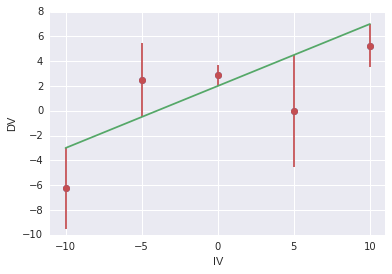

In [57]:
plt.plot(x, y, 'o')
plt.plot(x_model, y_model, '-')
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel('IV')
plt.ylabel('DV')
plt.xlim(-11,11)

In [66]:
import statsmodels.api as sm
lm_res = sm.OLS(y, sm.add_constant(x)).fit()

In [67]:
lm_res.summary()

/Users/Danny1/anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3.584
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.155
Time:                        11:07:42   Log-Likelihood:                -11.980
No. Observations:                   5   AIC:                             27.96
Df Residuals:                       3   BIC:                             27.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8659      1.534      0.565      0.612        -4.015     5.747
x1             0.4106      0.217      1.893      0.155        -0.280     1.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.334
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.516
Skew:                           0.051   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Container object of 3 artists>

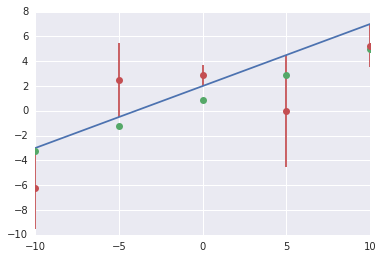

In [68]:
plt.plot(x_model, y_model)
plt.plot(x, lm_res.predict(sm.add_constant(x)),'o')
plt.errorbar(x, y, yerr=e, fmt='o', label='data')

In [69]:
wm_res = sm.WLS(y, sm.add_constant(x), weights=np.abs(e)).fit()

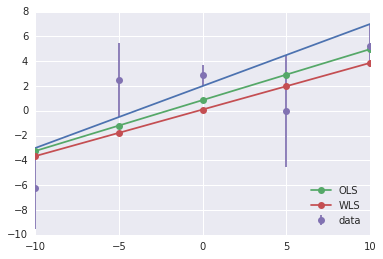

In [70]:
plt.plot(x_model, y_model)
plt.plot(x, lm_res.predict(sm.add_constant(x)),'-o', label='OLS')
plt.plot(x, wm_res.predict(sm.add_constant(x)),'-o', label='WLS')
plt.errorbar(x, y, yerr=e, fmt='o', label='data')
plt.legend(loc='lower right')

In [72]:
import statsmodels.formula.api as smf
import pandas as pd

In [78]:
dataDF = pd.DataFrame()
dataDF['x'] = x
dataDF['x2'] = x * x
dataDF['y'] = y
dataDF.head()

,x,x2,y
0,-10.0,100.0,-6.256892
1,-5.0,25.0,2.492036
2,0.0,0.0,2.848935
3,5.0,25.0,-0.018884
4,10.0,100.0,5.264199


In [80]:
fres = smf.ols(formula = 'y ~ x + x2', data=dataDF).fit()
fres.summary()

/Users/Danny1/anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1.774
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.361
Time:                        11:13:20   Log-Likelihood:                -11.394
No. Observations:                   5   AIC:                             28.79
Df Residuals:                       2   BIC:                             27.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3168      2.604      0.890      0.467        -8.887    13.520
x              0.4106      0.236      1.738      0.224        -0.606     1.427
x2            -0.0290      0.040     -0.727      0.543        -0.201     0.143
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.619
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.421
Skew:                          -0.330   Prob(JB):                        0.810
Kurtosis:                       1.742   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

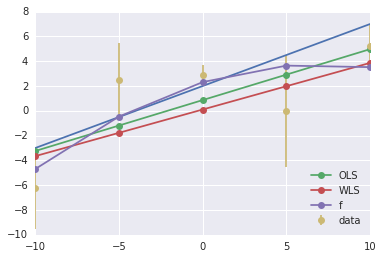

In [81]:
plt.plot(x_model, y_model)
plt.plot(x, lm_res.predict(sm.add_constant(x)),'-o', label='OLS')
plt.plot(x, wm_res.predict(sm.add_constant(x)),'-o', label='WLS')
plt.plot(x, fres.predict(), '-o', label = 'f')
plt.errorbar(x, y, yerr=e, fmt='o', label='data')
plt.legend(loc='lower right')